I first began my using the code from team member 2 to allow me to download and collate the respondant's answer files


In [2]:
import requests
from pathlib import Path
import os 
import matplotlib.pyplot as plt
import numpy as np

def download_answer_files(cloud_url:str, path_to_data_folder: str, respondent_index:int):
    data_folder= Path(path_to_data_folder)

    if not data_folder.exists():
        data_folder.mkdir(parents=True, exist_ok=True)

    for i in range(1, respondent_index+1):
        file_name= f"answers_respondent_{i}.txt"
        file_url=f"{cloud_url}/{file_name}?raw=true"
        local_name = os.path.join(path_to_data_folder, file_name)
        try:
                    response = requests.get(file_url)
                    response.raise_for_status()
                    with open(local_name, "w", encoding="utf-8") as file:
                        file.write(response.text)
                    print(f"Downloaded: {file_name}")
        except requests.RequestException as e:
            print(f"Failed to download {file_name}: {e}")
          
download_answer_files(
    cloud_url="https://github.com/tdvl3720-uol/Group-Project---Alan-Turing/raw/main/data",
    path_to_data_folder="data",
    respondent_index=25)

def collate_answer_files(data_folder_path):
    output_folder = "output"
    output_file_path = os.path.join(output_folder, "collated_answers.txt")
    
    
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    files = sorted(os.listdir(data_folder_path))
    
    with open(output_file_path, 'w', encoding='utf-8') as outfile:
        for filename in files:
            file_path = os.path.join(data_folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as infile:
                content = infile.read()
                outfile.write(content)
                outfile.write("\n*\n")  
    print(f"Collated answers saved to {output_file_path}")

Downloaded: answers_respondent_1.txt
Downloaded: answers_respondent_2.txt
Downloaded: answers_respondent_3.txt
Downloaded: answers_respondent_4.txt
Downloaded: answers_respondent_5.txt
Downloaded: answers_respondent_6.txt
Downloaded: answers_respondent_7.txt
Downloaded: answers_respondent_8.txt
Downloaded: answers_respondent_9.txt
Downloaded: answers_respondent_10.txt
Downloaded: answers_respondent_11.txt
Downloaded: answers_respondent_12.txt
Downloaded: answers_respondent_13.txt
Downloaded: answers_respondent_14.txt
Downloaded: answers_respondent_15.txt
Downloaded: answers_respondent_16.txt
Downloaded: answers_respondent_17.txt
Downloaded: answers_respondent_18.txt
Downloaded: answers_respondent_19.txt
Downloaded: answers_respondent_20.txt
Downloaded: answers_respondent_21.txt
Downloaded: answers_respondent_22.txt
Downloaded: answers_respondent_23.txt
Downloaded: answers_respondent_24.txt
Downloaded: answers_respondent_25.txt


Then, using the extract_answer_sequence from team member 1, I was able to extract sequences from each file

In [5]:
def extract_answers_sequence(file_path):
    answers = []
    with open(file_path, "r") as file:
        lines = [line.strip() for line in file.readlines() if line.strip() != ""]

    for i in range(0, len(lines), 5):
        question_block = lines[i:i+5]
        selected = 0
        for j in range(1, 5):
            if "[x]" in question_block[j]:
                selected = j
        answers.append(selected)

    return answers


Then, leveraging the code from team member 3, I was able to run an analysis on the respondant's answers, and plotted graphs to help visualise any pattern

[2.6315789473684212, 2.6875, 2.75, 2.4705882352941178, 2.466666666666667, 2.7058823529411766, 2.5, 2.5789473684210527, 2.5454545454545454, 2.3684210526315788, 2.611111111111111, 2.066666666666667, 2.0625, 2.375, 2.5555555555555554, 2.789473684210526, 2.5714285714285716, 2.6, 2.2941176470588234, 2.3529411764705883, 2.466666666666667, 2.5625, 2.588235294117647, 2.4210526315789473, 2.5454545454545454, 2.5454545454545454, 2.473684210526316, 2.5, 2.5625, 2.6470588235294117, 2.5714285714285716, 2.7, 2.526315789473684, 2.5789473684210527, 2.2941176470588234, 2.4375, 2.3125, 2.7857142857142856, 2.6470588235294117, 2.526315789473684, 2.65, 2.45, 2.5789473684210527, 2.6470588235294117, 2.473684210526316, 2.4375, 2.3684210526315788, 2.2941176470588234, 2.611111111111111, 2.55, 2.45, 2.388888888888889, 2.4375, 2.5555555555555554, 2.5, 2.7, 2.611111111111111, 2.4761904761904763, 2.4761904761904763, 2.625, 2.4375, 2.7058823529411766, 2.7222222222222223, 2.6, 2.5, 2.526315789473684, 2.473684210526316

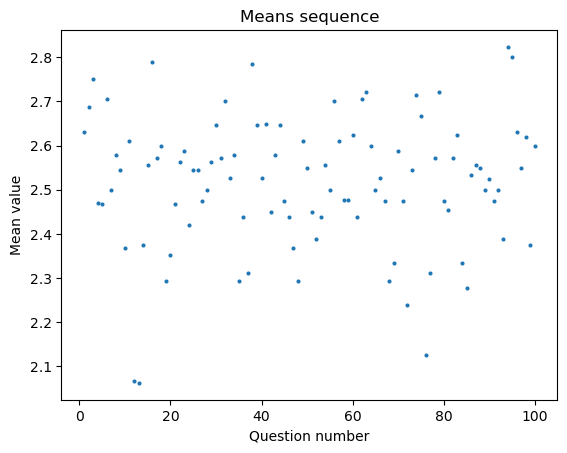

In [7]:
def generate_means_sequence(collated_answers_path):

    answers = extract_answers_sequence("output/collated_answers.txt")
    means = []
    num_questions = 100
    num_respondents = len(answers)//num_questions
    for i in range(num_questions):
        total = 0
        count = 0

        for j in range(num_respondents):
            index = j * num_questions + i
            value = answers[index]
            if value != 0:
                total += value
                count += 1
        mean = total / count if count > 0 else 0
        means.append(mean)
    return means

collated_answers_path = "output/collated_answers.txt"
means = (generate_means_sequence(collated_answers_path))
print(means)

def visualize_data(collated_answers_path, n):

    plt.close("all")
  
    if n==1:
        x = list(range(1, 101))
        y = means
        plt.scatter(x, y, s=15, marker = '.')
        plt.xlabel("Question number")
        plt.ylabel("Mean value")
        plt.title("Means sequence")
        plt.show()

    elif n==2:
        base_url = "https://raw.githubusercontent.com/tdvl3720-uol/Group-Project---Alan-Turing/main/data/"
        file_names = [f"answers_respondent_{i}.txt" for i in range(1, 26)]
        respondent_answers = []

        for file_name in file_names:
            url = base_url + file_name
            response = requests.get(url)
            if response.status_code == 200:
                lines = response.text.splitlines()
                answers = []
                
                for i in range(100):  
                    question_answers = lines[i * 4: (i + 1) * 4]  
                    answer = 0
                    
                    for option in question_answers:
                        if "[x]" in option:
                            answer = 1  
                            break
                            
                    answers.append(answer)
                respondent_answers.append(answers)  
            else:
                print(f"Failed to load {file_name}")

        plt.figure(figsize=(10, 6))
        for i, answers in enumerate(respondent_answers):
            plt.plot(range(1,101), answers, label = f'Respondent_{i+1}')
            plt.xlabel("Question numbers")
            plt.ylabel("Answered(1) / Not Answered(0)")
            plt.title("Individual Answers")
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Respondents")
            plt.xticks(np.arange(0, 101, 10))
            plt.show()
            

    else:
        print("error: n!=1, n!=2")

visualize_data(collated_answers_path, 1)


From the mean sequence plot, we can see that a lot of the dots lie around the 2.46 to 2.63 range, suggesting that most answers put down were the second or third option. Some dots stand out , with the dots around the 16 - 17th question being close to the value of 2, suggesting that majority answers put down on those questions were option 2. The same with the dot around the the 77th question, with it being close to 2.1, suggeting that majoirty also answered option 2 for that question.

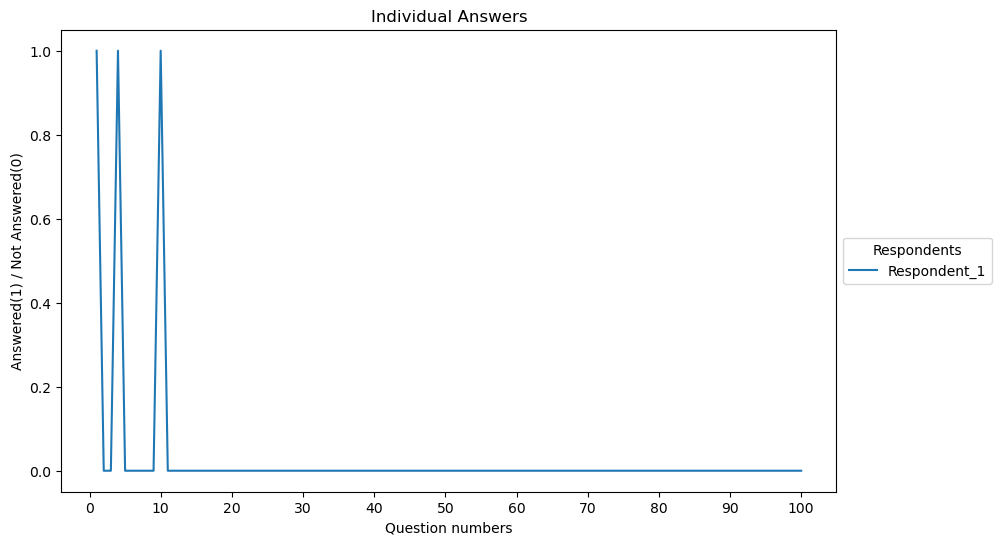

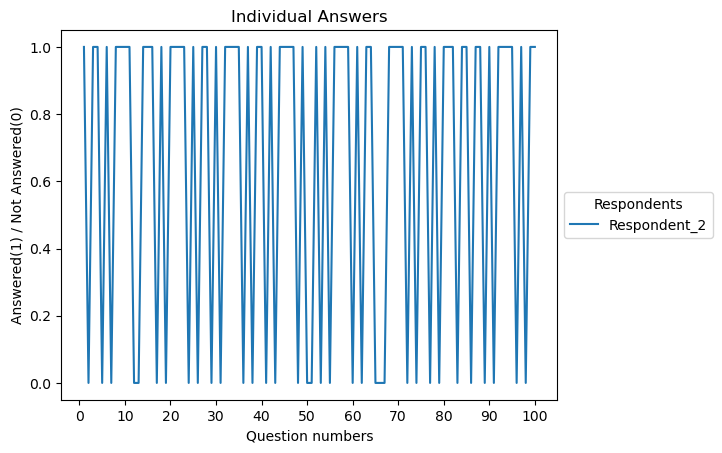

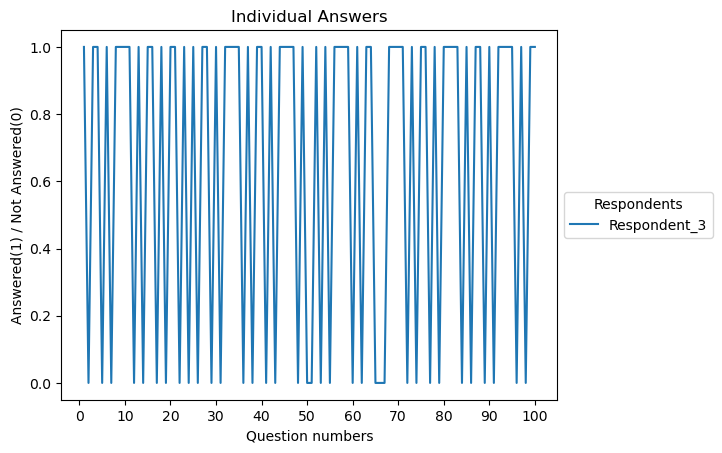

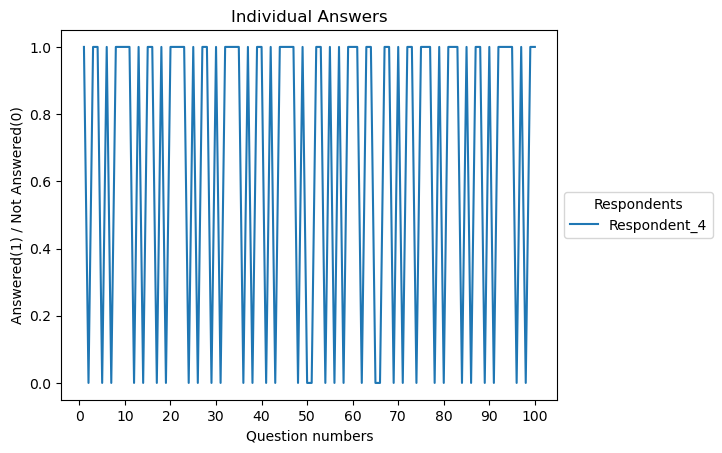

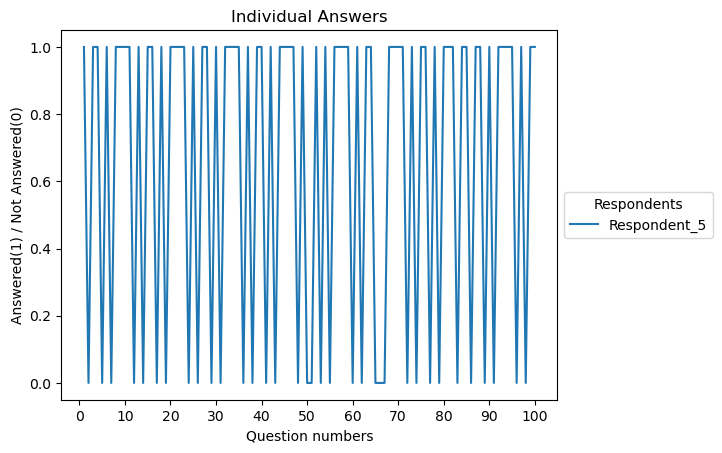

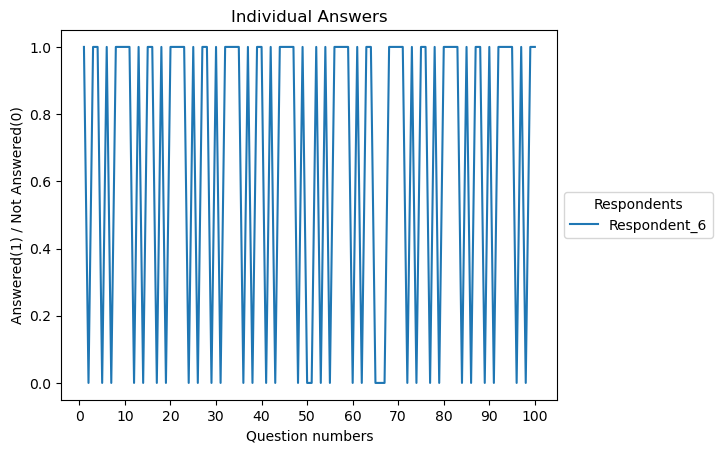

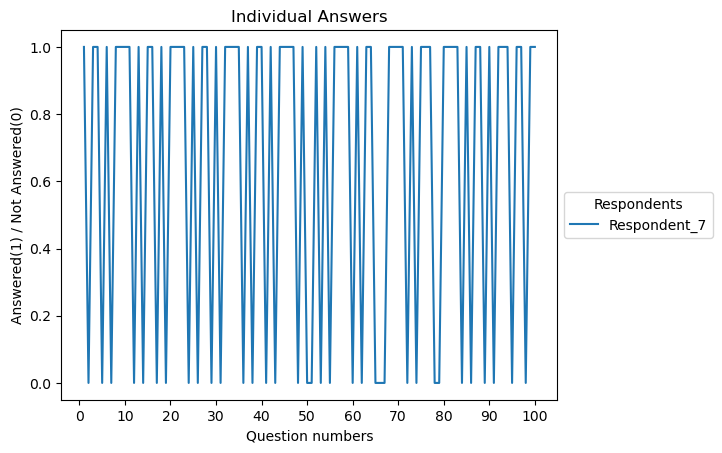

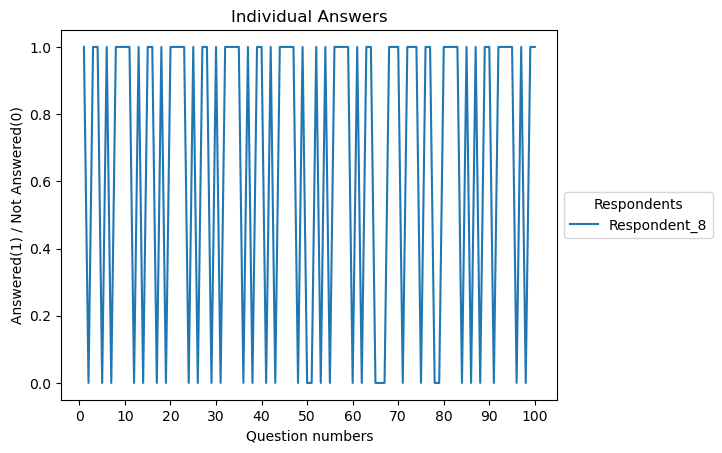

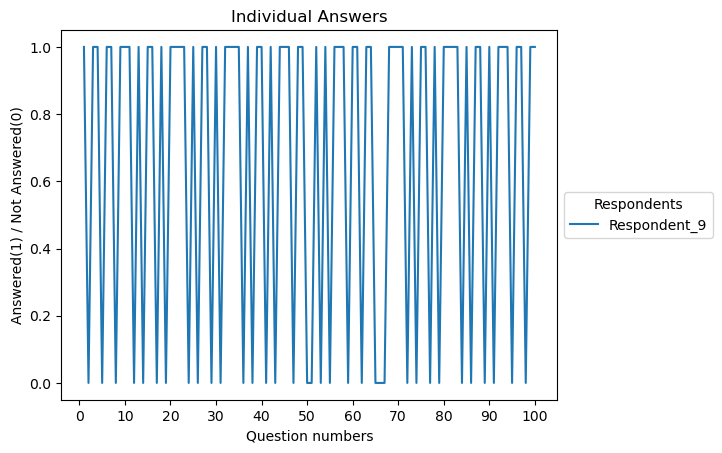

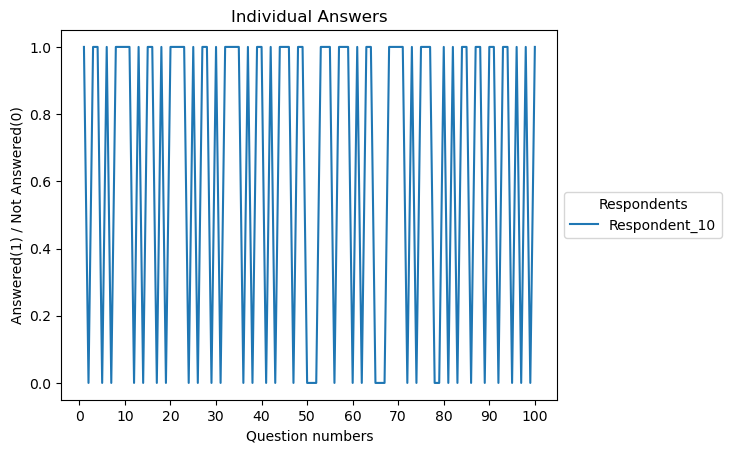

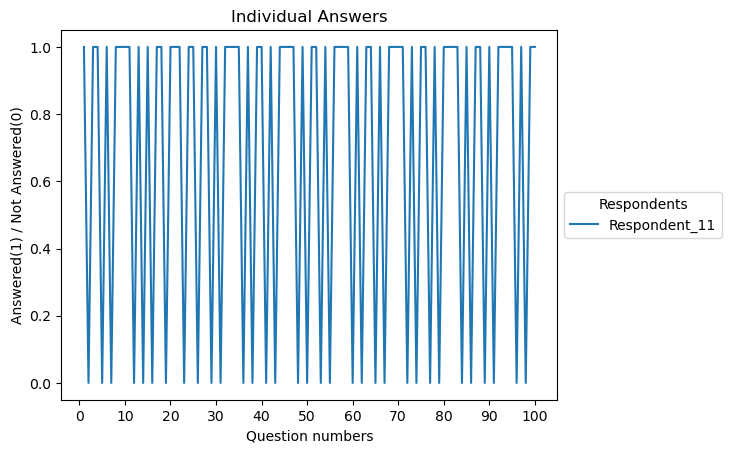

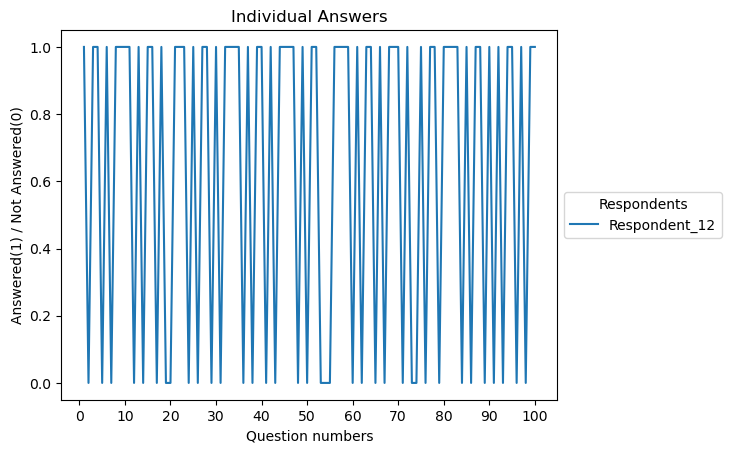

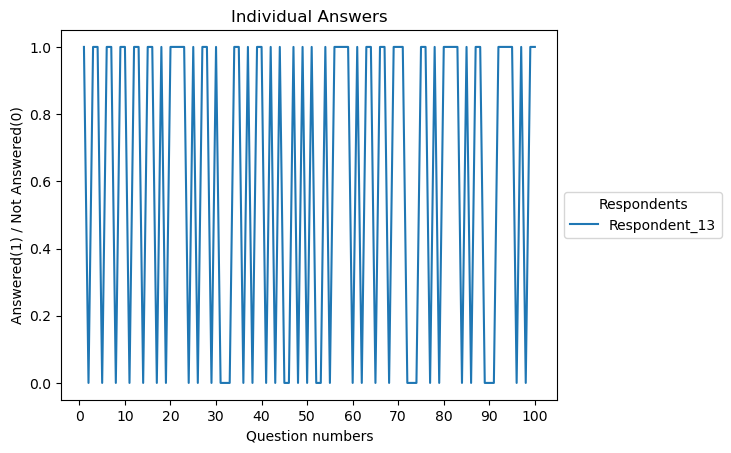

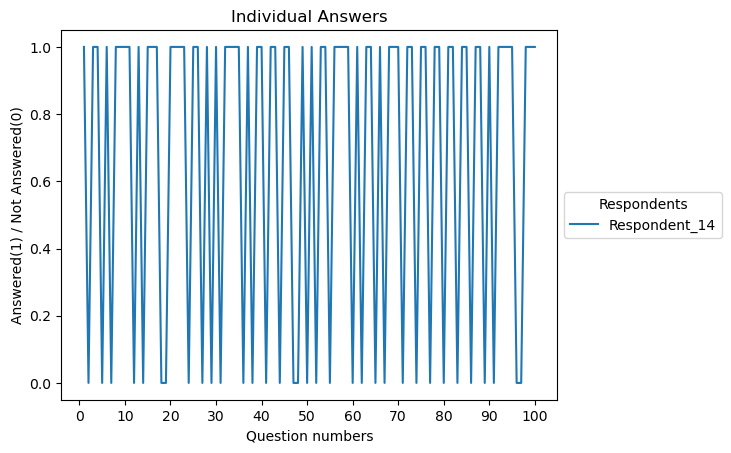

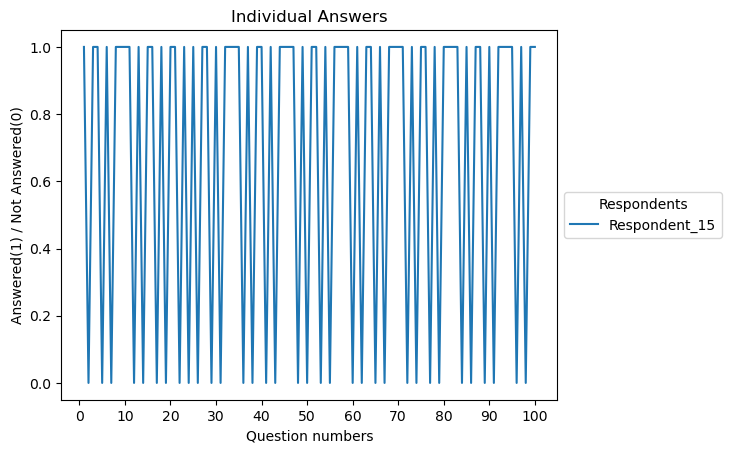

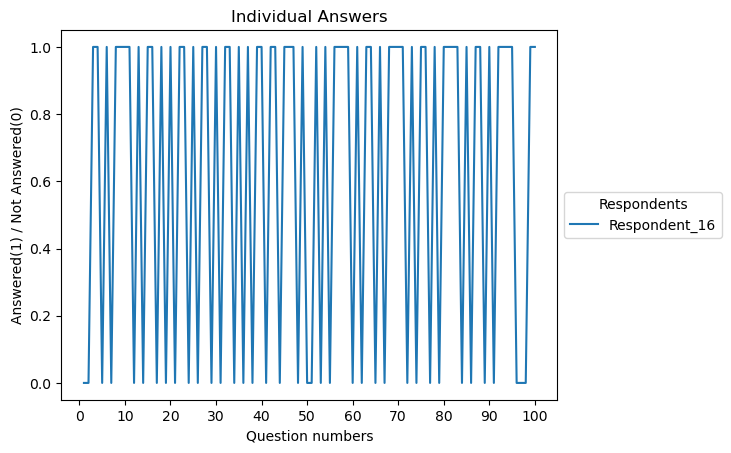

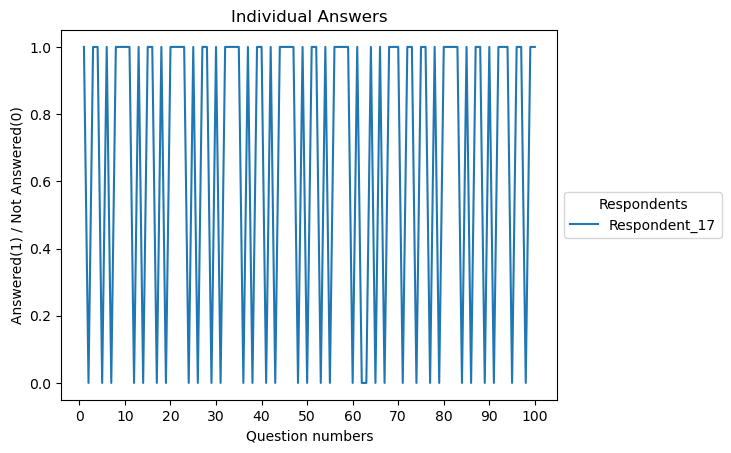

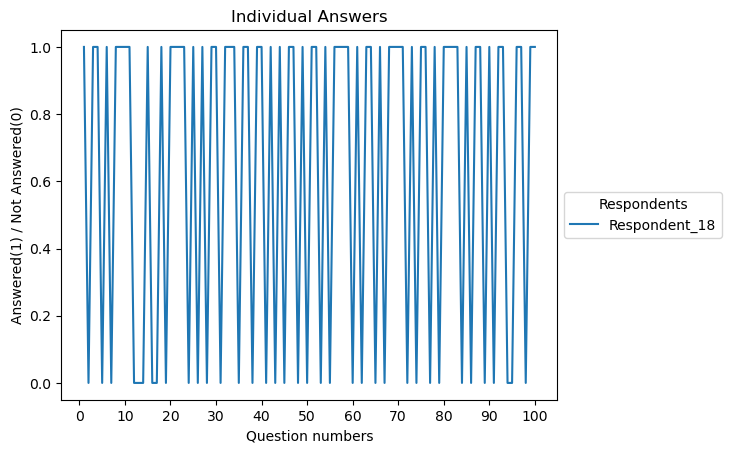

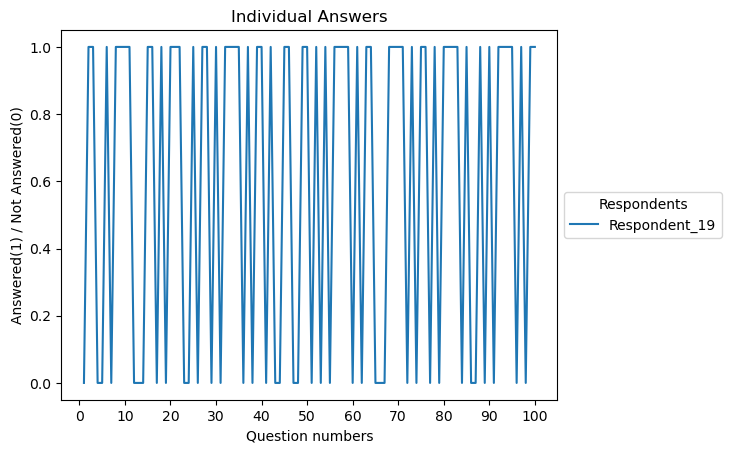

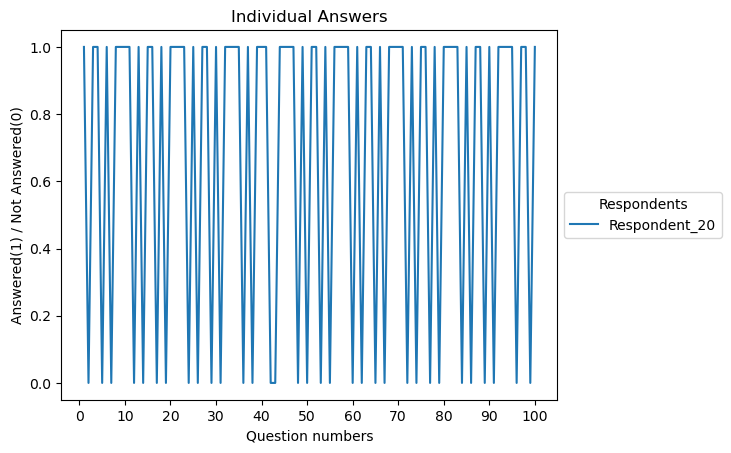

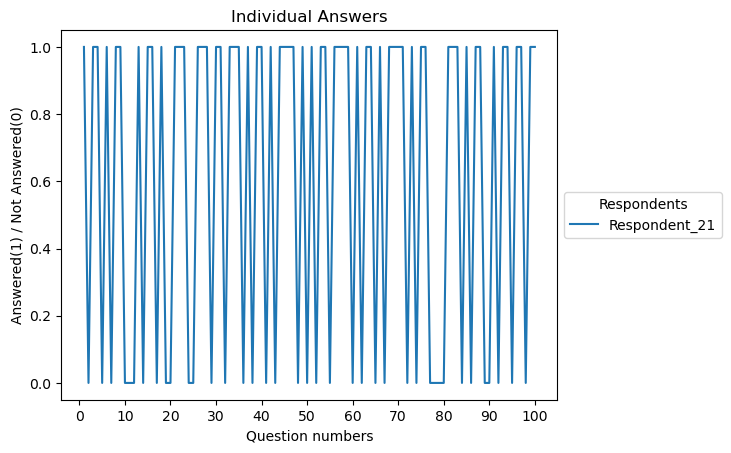

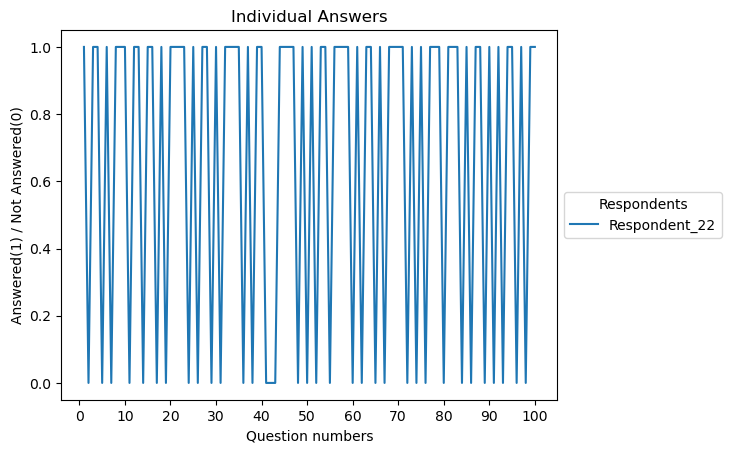

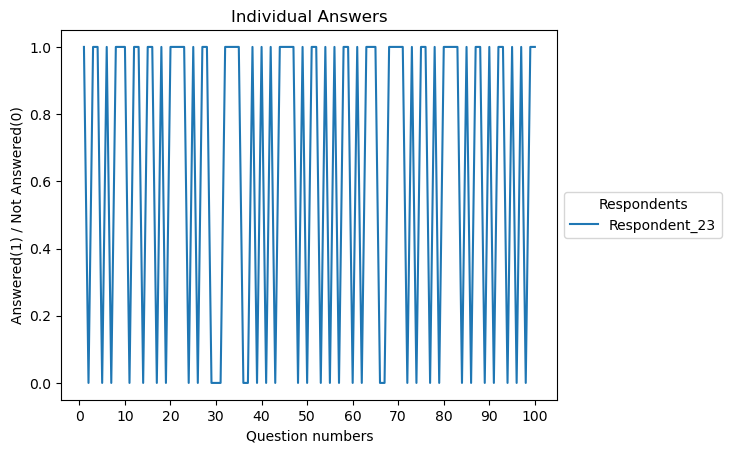

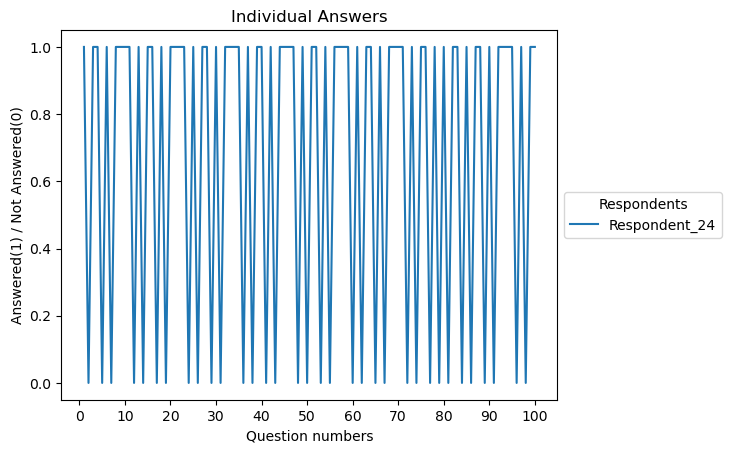

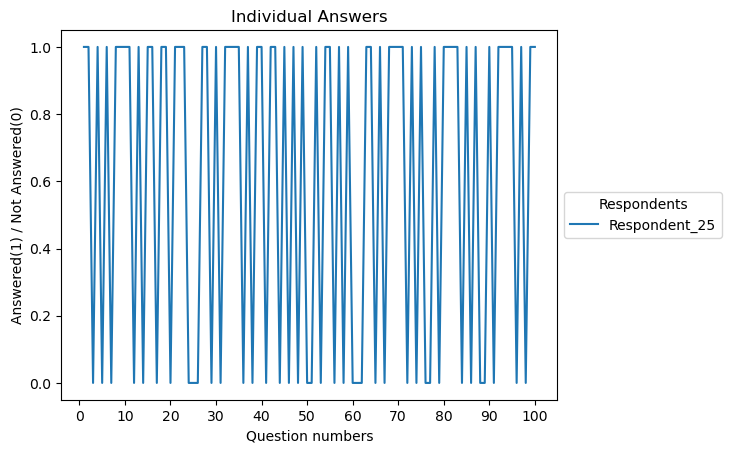

In [8]:
visualize_data(collated_answers_path, 2)

From the response graphs of each indivdual respondant, we can see that between 40-50, many seem to have attempted to answer those questions. Similarly, between question 90-94/95 question, respondants seem to have answered those questions as well. There also similar patterns like this, but majority of the questions have not been answered, compared to has been answered.
